### COMP3359 Artificial Intelligence Applications  
Department of Computer Science, HKU 
<br><br>
# <u>Checkpoint 5: Deep Reinforcement Learning</u>

## Estimated Time to Finish 
6~10 hours (excluding optional materials)

## Main Learning Objectives
- To recognize the use of Neural Network (Deep Q Network) with the purpose of Function Approximation in Deep Q Learning approach.
- To recognize other enhancements of Deep Q Learning from traditional Q Learning, i.e., Experience Replay
- To have experience of implementing Deep Q Learning algorithm to handle an application with continuous state space.

## Overview
1. [Introduction](#s1) 
2. [Problem Setting](#s2) 
3. [Deep Q Learning](#s3) 
4. [Task – Implement Deep Q-Learning Model](#s4) 
5. [Submission](#s5) 


----- 


<a id=’s1’></a>

# 1 Introduction

Previously, in the main tutorial of Module 5, we have studied the use of Q Learning in learning to navigate a taxi to pick up/drop off passengers. However, the problem is quite simple that there are only 500 states in the entire state space. Therefore, it is reasonable for you to wonder if the same Q Learning method would be able to solve more complicated problems, e.g., playing video games.

Unfortunately, although there are more advanced RL algorithms to play video games, it may be difficult for us to understand those algorithms if we immediately jump to there from Q Learning. As an intermediate step, this notebook introduces an example of the “Mountain Car” problem, which involves a state space with continuous state values, which already increases the difficulty of the problem when compared to the self-driving taxi problem.

This notebook introduces an enhancement of Q Learning, namely Deep Q Learning, in which a (deep) neural network called Deep Q Network is used to replace Q Table to improve its learning performance to handle more sophisticated problems.

After completion of the tasks in this notebook, you would have gained the experience of implementing the Deep Q Learning algorithm, while appreciating the enhancement of RL algorithms with deep neural networks to handle more complicated applications. 

----- 

<a id=’s2’></a>
# 2 Problem Setting 



## Environment – Mountain Car 

In this study, we will consider the [“Mountain Car”]( https://gym.openai.com/envs/MountainCar-v0/) environment from OpenAI Gym. According to the description from OpenAI Gym:

> A car is on a one-dimensional track, positioned between two "mountains". The goal is to drive up the mountain on the right; however, the car's engine is not strong enough to scale the mountain in a single pass. Therefore, the only way to succeed is to drive back and forth to build up momentum.

<center><img src='./figures/mountaincar.jpg' width='50%'/></center>

In this environment, the state is described by 2 values and 3 possible actions:

| Index | State | Min | Max |
|--------|-------|-------|-------|
| 0 | Car position <br> along x-direction | -1.2 | 0.6 |
| 1 | Car velocity | -0.07 | 0.07 |

<center>State space in “Mountain Car” environment</center>

| Index | Action |
|--------|--------|
| 0 | Push left |
| 1 | No push |
| 2 | Push right |

<center>Action space in “Mountain Car” environment</center>
<center>From: https://medium.com/@ts1829/solving-mountain-car-with-q-learning-b77bf71b1de2</center>

It is noteworthy that the state space of “Mountain Car” environment is a continuous state space, that each of the states is a real value within a continuous interval. Comparing with the “self-driving taxi” environment we have studied before, which has a finite discrete state space with just 500 states, the “Mountain Car” problem is comparable more difficult. If we only use Q Learning as we have attempted before, one probable problem is to describe the continuous state-action space with a discrete Q Table. 

## Approach – Deep Q Learning

Here, we consider the method of __Deep Q Learning (DQL)__, an enhancement of Q Learning using (deep) neural network, which the network used is usually referred as __Deep Q Network (DQN)__. This checkpoint will guide you to build a DQN model to handle the “Mountain Car” problem.

As aforementioned, the “Mountain Car” environment is provided by OpenAI Gym. Meanwhile, to construct our DQN model, we will use PyTorch in this notebook, but in general other frameworks supporting construction of neural networks are also suitable for this task.

----- 

<a id=’s3’></a>
# 3 Deep Q Learning 


## Previously on Q Learning

Before we start studying DQL, let’s have a revision on (traditional) Q Learning:

- What Q-Learning agent learns is the expected cumulative rewards table - __Q-table__
- Q-value of state-action pair $Q(s,a)$:
    - __expected cumulative rewards__ of taking action $a$ at state $s$     
    (usually, expected cumulative rewards = immediate rewards + future rewards)
- Training of Q-Learning model:
    1. Initialize Q-Table (all 0’s, random values, or else)
    2. The learning agent start at the initial state $s_0$ (start of episode)
    3. At each current state $s$, the learning agent decides to take action $a$, based on a random choice (exploration) or some Q-values ${\rm argmax}_a(Q(s,a))$ (exploitation) 
    4. Update Q-value: $Q(s,a) \leftarrow Q(s,a) + \alpha (r + \gamma \max_{a'}(Q(s',a'))-Q(s,a))$, where $r$ is the reward received when moving from the current state to the next state.
    5. The terminal state $s_t$ is reached (end of episode)
    6. Repeat steps 2-5 (for a specific number of episodes, until model converges, or else)
- After training:
     - After iterations of updating Q-values with the update rule above, the trained Q-values will then estimate the expected cumulative rewards, as in:    
     $Q(s,a) = r + \gamma \max_{a'}(Q(s',a'))$


## Deep Q-Learning

<u>Deep Q Network</u>

Recall that, in (traditional) Q Learning, the objective of training is to train Q values to accurately estimate the expected cumulative rewards of state-action pairs, so that in the equation of Q Learning,     

<center>$Q(s,a) = r + \gamma \max_{a'}(Q(s',a'))$,</center>    

left-hand side (LHS) and right-hand side (RHS) of the equation will have similar values. However, the use of discrete Q Table to represent the expected cumulative rewards may not be the most effective, especially when the state-action space is of high complexity.

In DQL, $Q(s,a)$ is considered as a function, where the input of the function is a state-action pair, and the output is the corresponding expected cumulative rewards. Usually, we consider the function to have continuous input domain, so that we can handle continuous state space. 

By considering $Q(s,a)$ as a function, we can then train a neural network, a.k.a. __Deep Q Network (DQN)__, to predict the values of $Q(s,a)$. To train such a DQN network, network weights are trained according to the temporal difference error $\delta$:

<center>$\delta = Q(s,a) - (r + \gamma \max_{a'}(Q(s',a')))$ .</center>

Therefore, by minimizing the temporal difference error $\delta$, the difference between LHS $𝑄(𝑠,𝑎)$ (predicted Q values) and RHS $𝑟 + \gamma\max_{a'}(𝑄(𝑠’,𝑎’))$ (target Q values) of the Q Learning equation is also minimized. Consequently, the DQN will also give an accurate approximation of the expected cumulative rewards.  

Note: This is an example usage of ML methods for __Function Approximation__. Here, given inputs (state-action) and outputs (rewards from the environment), we train a neural network to approximate the underlying mapping function (assuming there is one). In this case, we are trying to replace the Q Table in traditional Q Learning with a deep neural network DQN.

<u>Policy/Target Deep Q Networks</u>

Although our objective here is to approximate the Q Table with some deep neural network DQN, usually two neural networks are used during training instead of only one. The two DQNs involved are known as the Policy and Target networks.  

As aforementioned, DQNs are trained by minimizing the temporal difference error $\delta$:

<center>$\delta = Q(s,a) - (r + \gamma \max_{a'}(Q(s',a')))$ .</center>

Here, if only one DQN is used, then this DQN will be used for predicting two types of Q values at the same time: 1) Q values of current state and action $Q(s,a)$, and 2) Q values of next state and the possible actions $Q(s',a')$, as in the target Q value $(r + \gamma \max_{a'}(Q(s',a')))$.

It is noteworthy that during training the network weights of the DQN keep changing, so as the two predicted Q values. Even if we adjust the network weights in a way that makes $Q(s,a)$ closer to the target Q value $(r + \gamma \max_{a'}(Q(s',a')))$ at this moment, after we update the network weights according to the temporal difference error $\delta$, next time $Q(s,a)$ has to chase after a different target Q value. This makes it harder for the DQN to converge. 

Therefore, two DQNs called Policy network and Target network are used instead:

- Policy network: 
    - Used for predicting $Q(s,a)$, to determine action based on current state
    - Updated at every step of training
- Target network: 
    - Used for predicting the target Q value $(r + \gamma \max_{a'}(Q(s',a')))$
    - Only updated once in a while, by copying weights of the Policy network at the moment

Therefore, in between two updates of the Target network, the target Q value is fixed so the Policy Network will have a clearer target. This helps stabilize training and fosters convergence of the Policy network. 

<u>Experience Replay</u>

Recall that, in (traditional) Q Learning we have studied before, whenever an action is taken, the rewards received are used to update the Q values. In DQL, network weights of the DQN are updated in a different way.

DQL adopts the __Experience Replay__ approach. At each step, based on the state $𝑠$, action $𝑎$ is taken, reward $𝑟$ is received and the next state $𝑠’$ is observed. Usually, we call (state, action, reward, next_state) = $(s,a,r,s')$ as a transition. After recording this transition, instead of immediately using it to update DQN network weights, we first save the transition in a memory buffer. Later, training of DQN network is performed in a minibatch training fashion, that we (randomly) sample a batch of transitions from the memory buffer. Then, this batch of transitions is fed to DQN to train the network weights.

There are several advantages of adopting the Experience Replay approach to update DQN network weights. However, they will not be discussed in this study (you may check the materials suggested in “Recommended Materials (Optional)”). To quickly summarize the advantages, Experience Replay enables more stable training of our neural network model DQN.

<u>Algorithm of Deep Q Learning</u>

To sum up, the algorithm of DQL is provided in this sub-section. This may help us to construct the DQN model for the “Mountain Car” problem in upcoming sections.

1. Initialize:
    - (Deep Q-Learning) Policy DQN (to predict $Q(s,a)$)
    - (Deep Q-Learning) Target DQN (to predict $Q(s’,a’)$), by copying initial Policy Network
    - (Experience Replay) Memory buffer to store transitions (state, action, rewards, next state)=$(s,a,r,s')$ 
    
2. For each episode:
    1. (Game Starts) Initialize environment, get initial state
    2. For each step in the episode:
        1. (Epsilon-Greedy) Select action, by:
            1. (Exploration) With prob. $\epsilon$:
                1. Take random action
            2. (Exploitation) Otherwise (with prob. $1-\epsilon$):
                1. ($Q(s,a)$ for all $a$) Predict Q-values of current state (for all actions) using Policy DQN
                2. (${\rm argmax}_a( Q(s,a) )$ Pick action with maximum predicted Q-value
        2. Take action $a$, get rewards $r$, update environment, get next state $s'$
        3. (Experience Replay) Store current transition: $(s,a,r,s')$
        4. (Experience Replay) Train Policy DQN with __a batch of transitions in memory__, by:
            1. For each transition $(s, a, r, s’)$ in the batch:
                1. ($Q(s,a)$) Predict __Q-value of current state-action__ using Policy DQN
                2. ($Q(s’,a’)$ for all $a’$) Predict __Q-values of next state__  using Target DQN
                3. Compute the __target Q-value__
                    1. If next state $s’$ is a terminal state, target Q-value = 0
                    2. Otherwise, target Q-value = $r + \gamma \max_{a'}(Q(s',a'))$
                 4. ($Q(s,a) = r + \gamma \max_{a'}(Q(s',a'))$) Compute ```loss = difference between predicted Q-value (LHS) and target Q-value (RHS)```
            2. Update Policy DQN network weights according to the losses
        5. Once in every, say, N steps throughout the training, update Target DQN by copying network weights of Policy DQN
        6. If terminal state is reached:
            1. (Game Over) End of episode
        7. Otherwise:
            1. Continue to the next step




## Recommended Materials (Optional)

<u>Deep Q Learning</u>
- [RL — DQN Deep Q-network]( https://medium.com/@jonathan_hui/rl-dqn-deep-q-network-e207751f7ae4)
- [Guest Post: Demystifying Deep Reinforcement Learning](https://www.intel.com/content/www/us/en/artificial-intelligence/posts/demystifying-deep-reinforcement-learning.html)
- [Qrash Course: Reinforcement Learning 101 & Deep Q Networks in 10 Minutes]( https://towardsdatascience.com/qrash-course-deep-q-networks-from-the-ground-up-1bbda41d3677)

<u>Policy and Target DQNs</u>
- [Why does DQN require two different networks?](https://ai.stackexchange.com/questions/6982/why-does-dqn-require-two-different-networks)
- [Q-targets, Double DQN and Dueling DQN (Taking Deep Q Networks a step further)](https://theaisummer.com/Taking_Deep_Q_Networks_a_step_further/)
    - Discusses the topic of Policy/Target DQNs in section "Moving Q-Targets"
    - Also includes discussions about other enhancements of DQNs
- [Simple Reinforcement Learning with Tensorflow Part 4: Deep Q-Networks and Beyond](https://medium.com/@awjuliani/simple-reinforcement-learning-with-tensorflow-part-4-deep-q-networks-and-beyond-8438a3e2b8df)
    - Discusses the topic of Policy/Target DQNs in section "Addition 3: Separate Target Network"
    - Also includes discussions about other enhancements of DQNs
    

----- 

<a id=’s4’></a>
# 4 Task – Implement Deep Q-Learning Model

This section will guide you to construct a DQN model for the Mountain Car problem. In the subsequent sub-sections, we will try to implement the key components of the DQN model, with explanation to their functionalities provided. However, for some of the components, the codes to implement them are not completed. Your task in this checkpoint is to complete the missing parts by following the instructions provided. The completed components by you should pass the corresponding test cases. 

After completing all the missing parts, you should be able to train a DQN model which will be able to drive the car from the bottom of valley up to the top of the mountain.

<u>Code References</u>:

The following codes are developed while referencing the following materials:
- [Getting Started with Reinforcement Learning and Open AI Gym]( https://towardsdatascience.com/getting-started-with-reinforcement-learning-and-open-ai-gym-c289aca874f)
- [REINFORCEMENT LEARNING (DQN) TUTORIAL | PyTorch]( https://pytorch.org/tutorials/intermediate/reinforcement_q_learning.html)


## Before You Start




<u>Google Colab</u>

If you would like to run this notebook on Google Colab with GPU runtime, you may set it at:

Toolbar > Runtime > Change runtime type > Hardware accelerator > GPU

<u>Game Screen Display on Server</u>

By default, when one tries to get the game screen of the current state of the environment using ```env.render(…)```, OpenAI Gym needs a window to display the image. However, if you run the codes on devices hosted on a server, e.g., Google Colab, there is no window/screen to display the image, causing errors while running the codes. 

In order to get the game screen and display it in a notebook running on a hosted device, you will need to install the package ```Xvfb``` using the following codes. Then, prepare a virtual display at the very beginning, so that later when ```env.render(…)``` is executed, the game screen can be captured and displayed in the notebook. 


Note 1: This method may not be applicable to HKU CS GPU Farm, due to the lack of authority to install ```Xvfb``` on the hosted device.

Note 2: Even if the packages are properly installed in the previous code cell, you may still receive the following message:

```xdpyinfo was not found, X start can not be checked! Please install xdpyinfo!"```. 

The subsequent codes can still be executed without errors, so you may kindly ignore this message and proceed.



In [1]:
""" Preparation for Display on Server """
#!apt-get install -y xvfb 
#!pip install pyvirtualdisplay piglet

' Preparation for Display on Server '

In [2]:
# To display game screen in this notebook on a server,
# execute these first to prepare a virtual display.

# Even if the packages are properly installed in the previous code cell, 
# you may still receive the following message:
#    "xdpyinfo was not found, X start can not be checked! Please install xdpyinfo!"
# The subsequent codes can still be executed without errors, so you may kindly
# ignore this message and proceed.

#from pyvirtualdisplay import Display
#display = Display(visible=0, size=(1400, 900))
#display.start()

<u>HKU CS GPU Farm</u>

It is __not suggested__ to run this notebook on HKU CS GPU Farm. The method mentioned above may not be applicable to HKU CS GPU Farm, due to the lack of authority to install Xvfb on the hosted device. Since the function ```env.render(...)``` is used to get the environment state throughout this notebook, the codes may result in error on GPU Farm.


<u>Prerequisite Libraries</u>

In [3]:
""" Install Prerequisite Libraries """
!pip3 install gym==0.17.1
#!pip3 install torch==1.4.0

<u>Libraries to be used</u>

In [4]:
""" Libraries to be used """
import random
# PyTorch for DQN model
import torch
# OpenAI Gym for Mountain Car environment
import gym

# Matplotlib for visualization 
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.facecolor"] = "white"   # Set plots to have white background 

<u>Global Variables</u>

In [5]:
""" Experiment Parameters """
############################################################
# You may modify the values of parameters in this cell.    #
# However, the following values are selected in a way that #
# an improvement of DQN model performance will be observed #
# during training phase, if the upcoming tasks in this     #
# checkpoint are to completed appropriately.               #
#                                                          #
# Therefore, it is not suggested to modify the values,     #
# unless you have found it impossible to complete the      #
# tasks without changing the values.                       #
############################################################

# Store parameters in a python dict for later use
PARAMS = {}

##### MountainCar Environment #####
# ENV_NAME: name of Mountain Car environment in OpenAI Gym
# N_STATES: number of states in Mountain Car environment
# N_ACTIONS: number of possible actions in Mountain Car environment
PARAMS["ENV_NAME"] = 'MountainCar-v0'
PARAMS["N_STATES"] = 2
PARAMS["N_ACTIONS"] = 3

##### DQN Model #####
# GAMMA: discount rate of expected cumulative rewards, 
#        as in Q(s,a) = r + GAMMA * max_a'( Q(s',a') )
# LR: learning rate of DQN model
# LAMBDA: weight for regularization of network weights (as in "weight_dacay" parameter 
#         in PyTorch's Adam optimizer). Regularization is applied to avoid network weights 
#         have large values, and try to prevent overfitting of the model.
# TARGET_UPDATE_PER_STEPS: Target DQN will be updated every TARGET_UPDATE_PER_STEPS
#                          in training phase.
PARAMS["GAMMA"] = 0.99
PARAMS["LR"] = 0.001
PARAMS["LAMBDA"] = 0.0001
PARAMS["TARGET_UPDATE_PER_STEPS"] = 800

##### Experience Replay #####
# MEM_BUFFER_SIZE: max number of transitions to store in memory buffer
# BATCH_SIZE: batch size of transitions to be sampled during Experience Replay,
#             i.e. DQN training data input batch size
PARAMS["MEM_BUFFER_SIZE"] = 33590
PARAMS["BATCH_SIZE"] = 50

##### (Decaying) Epsilon Greedy #####
# In this notebook, linear epsilon decay is adopted, so epsilon will just decay
# from EPS_START down to EPS_END linearly in EPS_DECAY_STEPS steps.
# EPS_START: starting value of epsilon
# EPS_END: min value of epsilon
# EPS_DECAY_STEPS: number of steps for epsilon to decay from EPS_START to EPS_END.
#                  make sure there will be many enough steps for the model to explore 
#                  at the beginning of training.
PARAMS["EPS_START"] = 1
PARAMS["EPS_END"] = 0.01
PARAMS["EPS_DECAY_STEPS"] = 10000

##### Episodic Training #####
# N_EPISODES: number of episodes to train the DQN model
# MAX_STEP_PER_EPISODE: if the number of steps in an episode exceeds this number, 
#                       the episode will end and the environment will reset to start
#                       the next episode
PARAMS["N_EPISODES"] = 1500
PARAMS["MAX_STEP_PER_EPISODE"] = 200

# Printing out the values of all parameters (may not be ordered)
print("Experiment Parameters:")
print()
for key,item in PARAMS.items() :
    print("PARAMS[\"{}\"] = {}".format(key,item))

Experiment Parameters:

PARAMS["ENV_NAME"] = MountainCar-v0
PARAMS["N_STATES"] = 2
PARAMS["N_ACTIONS"] = 3
PARAMS["GAMMA"] = 0.99
PARAMS["LR"] = 0.001
PARAMS["LAMBDA"] = 0.0001
PARAMS["TARGET_UPDATE_PER_STEPS"] = 800
PARAMS["MEM_BUFFER_SIZE"] = 33590
PARAMS["BATCH_SIZE"] = 50
PARAMS["EPS_START"] = 1
PARAMS["EPS_END"] = 0.01
PARAMS["EPS_DECAY_STEPS"] = 10000
PARAMS["N_EPISODES"] = 1500
PARAMS["MAX_STEP_PER_EPISODE"] = 200


## OpenAI Gym Mountain Car Environment

Here, we will prepare the Mountain Car environment for later use.

In [6]:
""" Prepare Mountain Car Environment """
# Make a new MountainCar environment
env_name = PARAMS["ENV_NAME"]
env = gym.make(env_name)

# Description of MountainCar environment
print("State space: ", env.observation_space)
print("State: (x,v) = (position along x-direction, car velocity)")
init_state = env.reset()           # Get initial state
print("Initial state: ")
print(init_state)
print("-----")
print("Action space", env.action_space)
print("Possible actions: {0 (Push left), 1 (No push), 2 (Push right)}")
print("5 example actions: ")
print([ env.action_space.sample() for _ in range(5) ])
print("-----")

State space:  Box(2,)
State: (x,v) = (position along x-direction, car velocity)
Initial state: 
[-0.49740245  0.        ]
-----
Action space Discrete(3)
Possible actions: {0 (Push left), 1 (No push), 2 (Push right)}
5 example actions: 
[1, 2, 1, 2, 1]
-----


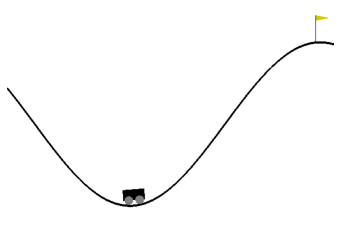

In [7]:
""" Game Screen Display """
# It is also possible to get the game screen showing position of the car.
# An RBG image frame with shape (height,width,3) is returned with mode='rgb_array'.
# 
# Note: Running this on server without virtual display prepared may cause error.
#       Skip this cell if the requirement is not met.
import os    
os.environ['KMP_DUPLICATE_LIB_OK']='True'

frame = env.render(mode='rgb_array')  

# Display the frame
plt.imshow(frame)
plt.axis('off')
plt.show()

## Deep Q Network 

In this study, we will experiment on a DQN model that is simply a Neural Network with 2 hidden Fully-Connected (a.k.a. Linear) layers. It is noteworthy that the DQN model takes the environment state (```in_dim=N_STATES```) as input and output the predicted Q values for all possible actions (```out_dim=N_ACTIONS```), as in ```Q(s,a) for all a```. However, the implementation of this model is left unfinished.

__<u>Q1) Implement the DQN model in PyTorch according to the model structure specified below.</u>__

|  | Layer Type | Input Dim. | Output Dim. |
|--|--|--|--|
| 1 | Linear | in_dim | 50 |
| 2 | ReLU | | |
| 3 | Linear | 50 | 50 |
| 4 | ReLU | | |
| 5 | Linear | 50 | out_dim |

The completed codes should pass the following test case, so that the following criterion (or criteria) is (are) fulfilled:

C1.1) Model output ```y_temp``` must have shape (1,3)



In [8]:
""" Deep Q Network """
import torch.nn as nn

# Class of DQN model
class DQN(nn.Module) :
    # Define model structure
    def __init__(self, in_dim, out_dim) :
        """
        Inputs:
        - in_dim: dimension of input of DQN model, expected to be the 
                       number of states (N_STATES).
        - out_dim: dimension of output of DQN model,
                        expected to be the number of possible actions (N_ACTIONS). 
        (so outputs of DQN model will be predicted Q-Values of input state s for 
         ALL ACTIONS, i.e. for each input
                         state s, returns a vector of Q(s,a) for all actions a)
                        
        """
        super(DQN, self).__init__()
        
        # Expected input shape: (B, 2)
        # Expected output shape: (B, 3)

        # DQN Model Structure:
        #            |            |              | Tensor Shape of   
        # Layer Type | Input Dim. |  Output Dim. |  Layer Output   
        # -----------|------------|--------------|-----------------
        #  Linear    | in_dim (2) |      50      |     (B,50)
        #  ReLU      |      -     |      -       |     (B,50)
        #  Linear    |     50     |      50      |     (B,50)
        #  ReLU      |      -     |      -       |     (B,50)
        #  Linear    |     50     |  out_dim (3) |     (B,3)

        # To construct your model here ...
        self.lin1 = nn.Linear(in_dim, 50)
        self.relu = nn.ReLU()
        self.lin2 = nn.Linear(50, 50)
        #self.relu2 = nn.ReLU()
        self.lin3 = nn.Linear(50, out_dim)

    # (Forward Propagation) Define how input data (x) goes through the DQN model 
    def forward(self, x):
        """
        Input(s):
        - x: Batch of input states, 
             with shape (batch_size, n_states)

        Output(s):
        - Predicted Q-Values of current state for all actions, 
          with shape (batch_size, n_actions)
        """
        # To be completed ...
        #print(x.shape)
        x = self.lin1(x)
        #print(x.shape)
        x = self.relu(x)
        #print(x.shape)
        x = self.lin2(x)
        #print(x.shape)
        x = self.relu(x)
        #print(x.shape)
        x = self.lin3(x)
        #print(x.shape)
        
        return x

In [9]:
""" Q1 Test Case (DQN) """
#################################################
# Please do not modify codes in this cell.      #
# If the missing codes in the previous cell is  # 
# completed appropriately, you should be able   #
# to execute this code cell without errors.     #
#################################################

##### Construct Temporary DQN Model for Testing #####
# Input dim
policy_temp = DQN(in_dim=PARAMS["N_STATES"], out_dim=PARAMS["N_ACTIONS"])

##### Test Case #####
# Test input state with one state: [[0.33,0.59]]
x_temp = torch.tensor([[0.33,0.59]])   # x_temp shape: (batch_size, num_state)

# Compute test model output
y_temp = policy_temp(x_temp)  # y_temp shape: (batch_size, num_actions)
print("Test results:")
print("y_temp shape: {} (expected: (1,3))".format(y_temp.shape))
print("y_temp values: {} (can be any)".format(y_temp.tolist()))
print("-----")

Test results:
y_temp shape: torch.Size([1, 3]) (expected: (1,3))
y_temp values: [[0.10625175386667252, 0.22031043469905853, 0.2943514585494995]] (can be any)
-----


## Experience Replay

There are two things required for implementation of Experience Replay algorithm:

1. Transition memory buffer to store transitions, and
2. Main Experience Replay procedure to update network weight.

Both of them have already been implemented for you in the following code cells, and there is __no missing codes in this sub-section__. The following code cells only provide the implementation codes, comments to explain code functionalities and some simple demo to illustrate how the functions work.

First, the transition memory buffer is implemented as followings:


In [10]:
""" Memory Buffer of Transitions for Experience Replay """
# Ref.: section "Replay Memory" from "PyTorch - Reinforcement Learning (DQN) Tutorial"
# https://pytorch.org/tutorials/intermediate/reinforcement_q_learning.html#replay-memory
from collections import namedtuple
import random

# Transitions: a tuple with predefined field names to store a single transaction. 
#
# For EACH transaction, the followings will be stored in each of the fields:
# "state": current state, PyTorch tensor with shape (1, N_STATES) 
# "action": action taken, PyTorch tensor with shape (1, 1)
# "reward": reward received, PyTorch tensor with shape (1)
# "next_state": state after action is performed, PyTorch tensor with shape (1, N_STATES)
#
# Note that a "batch dimension" (the first dimension with value 1) is added to the tensors (except rewards)
# so that it will be easier for us to pack a list with B transitions (each with shape, say, (1, N_STATES)))
# into one large tensor as DQN model input (with shape, say, (B, N_STATES))
Transition = namedtuple('Transition',
                        ('state', 'action', 'reward', 'next_state'))

# ReplayMemory: a cyclic buffer to store transitions.
# Later we will store transitions with push(...) function, and
# randomly sample of transition batches with sample(...) function
class ReplayMemory(object):
    def __init__(self, capacity):
        self.capacity = capacity
        self.memory = []
        self.position = 0

    def push(self, *args):
        """Saves a transition."""
        if len(self.memory) < self.capacity:
            self.memory.append(None)
        self.memory[self.position] = Transition(*args)
        self.position = (self.position + 1) % self.capacity

    def sample(self, batch_size):
        return random.sample(self.memory, batch_size)

    def __len__(self):
        return len(self.memory)

In [11]:
""" Demo Usage of Memory Buffer """
# Construct a temporary memory buffer for demo
memory_temp = ReplayMemory(2)    # A memory buffer that can only store 2 transitions

# 1st test transition 
s_temp,a_temp,r_temp,ns_temp = torch.zeros(1,2), torch.zeros(1,1).long(), torch.zeros(1), torch.zeros(1,2)
memory_temp.push(s_temp,a_temp,r_temp,ns_temp)    # Save to memory buffer
# 2nd test transition 
s_temp,a_temp,r_temp,ns_temp = torch.ones(1,2), torch.ones(1,1).long(), torch.ones(1), None
memory_temp.push(s_temp,a_temp,r_temp,ns_temp)    # Save to memory buffer

# Get an example transition batch with 2 transitions.
# The returned value is a python list of 2 Transition namedtuple (state, action, reward, next_state)
bs_temp = 2
state_batch_temp = memory_temp.sample(bs_temp)
print("Example transition batch: ")
print(state_batch_temp)

Example transition batch: 
[Transition(state=tensor([[0., 0.]]), action=tensor([[0]]), reward=tensor([0.]), next_state=tensor([[0., 0.]])), Transition(state=tensor([[1., 1.]]), action=tensor([[1]]), reward=tensor([1.]), next_state=None)]


The next code cell shows the implementation of the main Experience Replay algorithm. It is worth emphasizing that updating of DQN model network happens at the end of this function. This means that the DQN is only trained during Experience Replay, but not at other moments.

In [12]:
import torch.nn.functional as F

def experience_replay(policy_net, target_net, memory, optimizer, params, DEBUG=False) :
    """
    Input(s) :
    - policy_net: Policy DQN
    - target_net: Target DQN
    - memory: Transition memory buffer
    - optimizer: optimizer used by dqn model
    - params: dictionary storing global parameters.
              expected parameter:
              - params["BATCH_SIZE"]: input batch size
              - params["GAMMA"]: discount rate in Q(s,a) = r + gamma * max_a'( Q(s',a') )
    - DEBUG: print debug messages if true
    Output(s) :
    - loss value compute from the sampled input transition batch.
    """
    if DEBUG :
        print("===== Start of Experience Replay =====")
    # Get global parameters
    BATCH_SIZE = params["BATCH_SIZE"] # Input batch size
    GAMMA = params["GAMMA"]           # Discount rate in Q(s,a) = r + gamma * max_a'( Q(s',a') )
    
    # Skip training DQN model if there are not enough saved transitions in the memory buffer
    # to give a input batch.
    if len(memory) < BATCH_SIZE :
        # Return a loss value = 0 to notice that training is not yet started (only for logging)
        return torch.tensor([0])

    device = next(policy_net.parameters()).device # Get computation device used by DQN model

    ##### Prepare Transition Data Batch #####
    # Randomly sample BATCH_SIZE Transition tuples (state, action, reward, next_state),
    # each of (state, action, reward, next_state) is a PyTorch tensor. 
    # Shapes of tensors (in each 4-tuple in "transitions"): 
    #    state: (1, N_STATES), action: (1, 1), reward: (1), next_state: (1, N_STATES)
    # "transitions" is then a python list of 4-tuples with length BATCH_SIZE.
    transitions = memory.sample(BATCH_SIZE)
    # Convert the python list of Transition tuples ("transitions") to one single 
    # Transititon tuple (state, action, reward, next_state) ("batch"). 
    # Each of (state, action, reward, next_state) in "batch" is a list (with length BATCH_SIZE) 
    # of tensors of that field in this data batch.
    batch = Transition(*zip(*transitions))

    # For each list of tensors (batch.[state/action/next_state/reward]) in "batch",
    # convert the list into one single tensor ([state/action/next_state/reward]_batch).
    #
    # torch.cat(...) is used to concatenate a list of B tensors with shape (1, N) to 
    # a tensor with shape (B, N)
    state_batch = torch.cat(batch.state)                                                       # shape: (B, N_STATES)
    action_batch = torch.cat(batch.action)                                                     # shape: (B, 1)
    reward_batch = torch.cat(batch.reward)                                                     # shape: (B)
    # Now, state_batch has the shape of input data to the DQN model.

    # However, it is not enough to simply concatenate batch.next_state (list of smaller tensors) 
    # as next_state_batch (one larger tensor).
    # This is because if the terminal state is achieved, next_state is marked as None.
    # Also, later when we try to predict Q(s',a') for next state s', DQL is not designed to accept 
    # terminal next state, and we will just set the term "gamma * max_a'( Q(s',a') )" to 0.
    #
    # Thus, we extract the non-final next state first, which will be used to predict Q(s',a') of 
    # non-final next states later.
    non_final_next_states = torch.cat([s for s in batch.next_state
                                                if s is not None])                             # shape: (B_non_final)
    # To keep track of the non-final next states, we use a mask to mark down locations of values 
    # of non-final next states.
    non_final_mask = torch.tensor(tuple(map(lambda s: s is not None,
                                          batch.next_state)), device=device, dtype=torch.bool)
                                                                                               # shape: (B)
    if DEBUG :
        print("State batch: \n", state_batch)
        print("Action batch: \n", action_batch)
        print("Reward batch: \n", reward_batch)
        print("Locations of non-final next states: \n", non_final_mask)
        print("-----")

    ##### Deep Q Learning #####
    # Recall the equation of Q Learning:
    #     Q(s,a) = r + gamma * max_a'( Q(s',a') ) 

    ### LHS: Q(s,a) ###
    # policy_net(state_batch) :                                                                # shape: (B, N_ACTIONS)
    #     Policy DQN predicts Q values of current state Q(s,a) for all possible actions a.
    # policy_net(state_batch).gather(1, action_batch): 
    #     As we are only interested in updating the Q value Q(s,a) of the taken action a,
    #     we gather the corresponding the concerned Q value according to index of action in action_batch.
    state_action_values = policy_net(state_batch).gather(1, action_batch)                      # shape: (B,1)
    if DEBUG :
        print("Predicted Q values (LHS) = Q(s,a)")
        print("= ", state_action_values)

    ### RHS: r + gamma * max_a'( Q(s',a') ) ###
    # next_state_values :
    #     prepare a 0-value tensor for later to store the max predicted Q values max_a'(Q(s',a')).
    next_state_values = torch.zeros(BATCH_SIZE, device=device)                                 # shape: (B)
    # target_net(non_final_next_states), shape (B_non_final) :
    #     Target DQN predicts Q values Q(s',a') for all possible actions a' (for non-final next state only)
    # target_net(non_final_next_states).max(1)[0].detach(), shape (B_non_final)
    #     max value of predicted Q values max_a'(Q(s',a'))
    # next_state_values[non_final_mask] = target_net(non_final_next_states).max(1)[0].detach() :
    #     update only values in next_state_values that correspond to non-final next states
    next_state_values[non_final_mask] = target_net(non_final_next_states).max(1)[0].detach()   # shape: (B)
    # expected_state_action_values :
    #     target Q values = r + gamma * max_a'( Q(s',a') )
    expected_state_action_values = reward_batch + (GAMMA * next_state_values)                  # shape: (B)
    if DEBUG :
        print("Target Q values (RHS) = r + gamma * max_a'( Q(s',a') )")
        print("= ", expected_state_action_values)

    ##### Update Network Weights #####
    # Compute the loss between predicted Q values (LHS) and target Q values (RHS).
    # Mean Squared Error (MSE) is used as the loss function:
    #     loss = (LHS - RHS)^2
    loss = F.mse_loss(state_action_values, expected_state_action_values.unsqueeze(1))

    # Update of DQN network weights
    optimizer.zero_grad()
    loss.backward()
    for param in policy_net.parameters():
        # Gradients are clipped within range [-1,1], to prevent exploding magnitude of gradients
        # and failure of training.
        param.grad.data.clamp_(-1, 1)
    optimizer.step()

    if DEBUG :
        print("Loss: ", loss)
        print("===== End of Experience Replay =====")
    # Return the computed loss value (for logging outside this function)
    return loss


In [13]:
""" Demo of Experience Replay """
# From previous demos:
# policy_temp: test policy DQN
# memory_temp: test memory buffer

# Construct temporary target DQNs
target_temp = DQN(in_dim=PARAMS["N_STATES"], out_dim=PARAMS["N_ACTIONS"])

# Construct a temporary optimizer
import torch.optim as optim
optimizer_temp = optim.Adam(policy_temp.parameters(), lr=0.1)
params_temp = {"BATCH_SIZE":2, "GAMMA": 0.99}

# Demo of experience replay. 
# By setting DEBUG=True, values at intermediate steps will be displayed.
# The returned value is the loss computed while updated the network weights
loss_temp = experience_replay(policy_temp, target_temp, memory_temp, optimizer_temp, params_temp, DEBUG=True)
print("")
print("Loss computed while updated the network weights: ", loss_temp)

===== Start of Experience Replay =====
State batch: 
 tensor([[1., 1.],
        [0., 0.]])
Action batch: 
 tensor([[1],
        [0]])
Reward batch: 
 tensor([1., 0.])
Locations of non-final next states: 
 tensor([False,  True])
-----
Predicted Q values (LHS) = Q(s,a)
=  tensor([[0.2026],
        [0.1558]], grad_fn=<GatherBackward>)
Target Q values (RHS) = r + gamma * max_a'( Q(s',a') )
=  tensor([1.0000, 0.0788])
Loss:  tensor(0.3209, grad_fn=<MseLossBackward>)
===== End of Experience Replay =====

Loss computed while updated the network weights:  tensor(0.3209, grad_fn=<MseLossBackward>)


## Decaying Epsilon Greedy Exploration Policy

Previously in Module 5, we have studied the topic of Exploration-Exploitation trade-off, and we have studied the use of Epsilon-greedy policy to guide the RL model to manage the balance between exploration and exploitation. In the previous example we have studied, we only used a constant exploration probability for all the time during training. In this study, we use a decaying exploration probability which starts at a large probability and decays over time. This allows the DQN model to explore more states at the beginning, and then attempt to refine its learning when training goes on. 

For simplicity, we only make epsilon to decay linearly over time.


In [14]:
""" Epsilon Decay """
import math

def get_epsilon(global_step, params):
    """
    Input(s) :
    - global_step: total number of steps taken so far from the beginning of training phase
    - params: dictionary of global parameters, expecting values:
              - params["EPS_START"]: starting value of epsilon
              - params["EPS_EN"]: min value of epsilon
              - params["EPS_DECAY_STEPS"]: number of steps for epsilon to decay from EPS_START to EPS_END.
    Output(s):
    - epsilon value at global_step
    """
    EPS_START = params["EPS_START"]
    EPS_END = params["EPS_END"]
    EPS_DECAY_STEPS = params["EPS_DECAY_STEPS"]

    if global_step <= EPS_DECAY_STEPS :
        # When global_step <= EPS_DECAY_STEPS, epsilon is decaying linearly.
        return EPS_START - global_step * (EPS_START - EPS_END)/EPS_DECAY_STEPS
    else :
        # Otherwise, epsilon stops decaying and stay at its minimum value EPS_END
        return EPS_END

Starting epsilon value:  1
Minimum epsilon value:  0.01
#Steps of (linear) decay:  10000


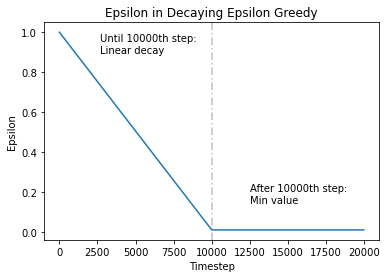

In [15]:
""" Demonstration of Decaying value of Epsilon """
# Setting for demonstration of decaying epsilon value
print("Starting epsilon value: ", PARAMS["EPS_START"])
print("Minimum epsilon value: ", PARAMS["EPS_END"])
print("#Steps of (linear) decay: ", PARAMS["EPS_DECAY_STEPS"])

# Let's observe for 20000 timesteps
steps_temp = [ i for i in range(20000) ]

# Get the epsilon value at each of the 20000 timesteps
eps_temp = [ get_epsilon(step, PARAMS) for step in steps_temp ]

# Plotting the trend of epsilon value
fig, ax = plt.subplots()
ax.set_title("Epsilon in Decaying Epsilon Greedy")
ax.plot(eps_temp)
ax.set_xlabel("Timestep")
ax.set_ylabel("Epsilon")
ax.annotate('Until 10000th step:\nLinear decay',
            xy=(100.0, 225.0), xycoords='figure pixels')
ax.annotate('After 10000th step:\nMin value',
            xy=(250.0, 75.0), xycoords='figure pixels')
ax.axvline(10000, color='gray', alpha=0.5, dashes=(5,2,1,2))
plt.show()

At each step, we determine the action based on the epsilon value. Recall that in Epsilon-greedy policy:
1. with probability epsilon: take random action (Exploration)
2. otherwise: predict action with DQN model (Exploitation)

__The implementation of Epsilon-greedy policy is left for you to finish.__

__<u>Q2) Implement Epsilon-greedy policy according to the instructions provided below.</u>__

The completed codes should pass the following test case, so that the following criterion (or criteria) is (are) fulfilled:

C2.1) For “Test Case 2.1”, the 10 output actions should have DIFFERENT values (may have duplication, but not all the same)

C2.2) For “Test Case 2.2”, the 10 output actions should have the SAME value


In [16]:
""" Epsilon-Greedy Policy """
def select_action(policy_net, state, epsilon, params):
    """
    Input(s) :
    - policy_net: Policy DQN for predicting Q values (for Exploitation)
    - state: current state for predicting Q values (for Exploitation)
    - epsilon: exploration probability
    - params: dictionary of global parameters, expecting:
              - params["N_ACTIONS"]: number of possible actions
    Output(s) :
    - action: action to be taken, a tensor with type long and shape (1,1)
    """
    if random.random() <= epsilon :
        # With prob. epsilon,
        # (Exploration) select random action.
        device = next(policy_net.parameters()).device # Get computation device used by DQN model

        # Your task:
        # 1. Pick a random action 
        # 2. Prepare the action as a tensor with type long and shape (1,1)
        # (Hint: you may consider random.randrange(...))
        action = torch.tensor([[random.randrange(params["N_ACTIONS"])]], device=device, dtype=torch.long)
        

    else :
        # With prob. 1 - epsilon, 
        # (Exploitation) select action with max predicted Q-Values of current state.

        # Your task:
        # 1. Predict Q values of current state
        # 2. Select action with greatest Q value
        # 3. Prepare the action as a tensor with type long and shape (1,1)
        # (Hint: policy_net(state) outputs the Q values for all actions)
        with torch.no_grad():
             action = policy_net(state).max(1)[1].view(1, 1)
        
    return action


In [17]:
""" Q2 Test Cases (Epsilon Greedy) """
#################################################
# Please do not modify codes in this cell.      #
# If the missing codes in the previous cell is  # 
# completed appropriately, you should be able   #
# to execute this code cell without errors.     #
#################################################

s_temp = torch.zeros(1,2)  # use [[0,0]] as an test input state 

##### Test Case 2.1 - Exploration #####
# Epsilon=1: Always explore (use random action)
eps_explore = 1

actions_explore = [ select_action(policy_temp, s_temp, eps_explore, PARAMS) \
                        for _ in range(10) ]
print("Test Case 2.1 - Exploration: ")
print("Actions (Expected to have DIFFERENT values): ")
print(torch.cat(actions_explore).tolist())         # Convert to a list for clear display
print("-----")

##### Test Case 2.2 - Exploitation #####
# Epsilon=0: Always exploit (use model predicted action)
eps_exploitation = 0

# Using the same state, get the suggested action for 10 times
actions_exploitation = [ select_action(policy_temp, s_temp, eps_exploitation, PARAMS) \
                        for _ in range(10) ]
print("Test Case 2.2 - Exploitation: ")          
print("Actions (Expected to have the SAME value for all 10 trials): ")
print(torch.cat(actions_exploitation).tolist())    # Convert to a list for clear display
print("-----")

Test Case 2.1 - Exploration: 
Actions (Expected to have DIFFERENT values): 
[[0], [2], [2], [2], [2], [1], [0], [2], [1], [0]]
-----
Test Case 2.2 - Exploitation: 
Actions (Expected to have the SAME value for all 10 trials): 
[[1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]
-----


# Utility Functions

Some utility functions are prepared to facilitate training of DQN model later. There is no missing part in this sub-section.

In [18]:
def preprocess_state(state, device=None) :
    """
    To convert the state prepared by Gym and to a format
    that is convenient for later processing 
    (see comments in function Experience replay)

    Input(s) :
    - state: state numpy array prepared by Gym envrionment
    - device: computation device used for PyTorch tensors
    
    Output(s) :
    - state: state as a PyTorch tensor with type float and
             shape (1,2)
    """
    #                                # The following values are default values.
    #                                # variable type | value type | data shape
    # input state                    # numpy.ndarray |   float64  | (2,)  
    state = torch.from_numpy(state)  # torch.Tensor  |   double   | (2)  
    state = state.float()            # torch.Tensor  |   float    | (2)  
    state = state.unsqueeze(0)       # torch.Tensor  |   float    | (1,2)  

    # Pass state tensor to the specified computation device 
    # (if None, the default device is used)
    state = state.to(device)

    return state

def adjust_reward(reward, next_state) :
    """
    Adjust reward based on the reward itself and the next state to 
    foster training of DQN model.
    see: https://towardsdatascience.com/getting-started-with-reinforcement-learning-and-open-ai-gym-c289aca874f

    Input(s) :
    - reward: reward received from envrionment
    - next_state: next state after action is taken

    Output(s) :
    - adjusted reward, as a integer value
    """
    if next_state[0] >= 0.1:
        reward += 10
    elif next_state[0] >= 0.25:
        reward += 20
    elif next_state[0] >= 0.5:
        reward += 100
      
    return reward

## Main Model Training Loop

With the functions implemented above, we can start training the DQN model here. Most of the codes of the training loop are prepared, but there are 5 steps left unfinished. Your task is then to complete the 5 missing parts and the training codes work.

__<u>Q3) Complete the 5 missing code sections according to the instructions provided below.</u>__

The completed codes should pass the following test case, so that the following criterion (or criteria) is (are) fulfilled:

C3.1) The training codes can be executed without errors

C3.2) It can be shown that the performance of DQN model is improved after training, using the evaluation codes provided in the next sub-section ("Training Results").

Hints:
- Most of the sub-tasks below only require simple reuses of the appropriate function(s) defined above.
- You may change the values of hyperparameters defined earlier. However, if all the codes in this checkpoint are completed appropriately, the default hyperparameter values should be good enough to train a DQN model that shows improved performance at the end of training (refer to sub-section "Training Results"). Therefore, it is __not suggested__ to modify the values for the purpose of completing this checkpoint, unless you have found it impossible to meet the requirements without doing so.


In [19]:
""" Initialize DQN Model and Memory Buffer"""
##### Deep Q Network Model #####
# Computation device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device: ", device)

# Construct Policy/Target DQN model
policy_net = DQN(in_dim=PARAMS["N_STATES"], out_dim=PARAMS["N_ACTIONS"]).to(device)
target_net = DQN(in_dim=PARAMS["N_STATES"], out_dim=PARAMS["N_ACTIONS"]).to(device)
# Initialize Target DQN by copying Policy DQN's initial weights
target_net.load_state_dict(policy_net.state_dict())
# Set target network to eval model. We do not train target network to modify its network weights
target_net.eval()   
print("DQN Model Structure: ")
print(policy_net)

# Optimizer (created for Policy DQN)
import torch.optim as optim
optimizer = optim.Adam(policy_net.parameters(), lr=PARAMS["LR"], weight_decay=PARAMS["LAMBDA"])
print("-----")
##### Memory Buffer for Experience Replay #####
memory = ReplayMemory(PARAMS["MEM_BUFFER_SIZE"])
print("Memory Buffer Size: ", PARAMS["MEM_BUFFER_SIZE"])
print("Saved Transitions in Memory: {} (Empty)".format(len(memory)))
print("-----")

Device:  cuda
DQN Model Structure: 
DQN(
  (lin1): Linear(in_features=2, out_features=50, bias=True)
  (relu): ReLU()
  (lin2): Linear(in_features=50, out_features=50, bias=True)
  (lin3): Linear(in_features=50, out_features=3, bias=True)
)
-----
Memory Buffer Size:  33590
Saved Transitions in Memory: 0 (Empty)
-----


In [20]:
""" Main Training Loop """
from time import time

# For logging
global_steps = 0    # Counter of total #steps in training phase
all_rewards = []    # Rewards received in each episode
all_steps = []      # Steps taken in each episode
all_max_xs = []     # Max x car position achieved in each episode

##### 1. Initialization #####
# policy_net: Policy DQN created and initialize above
# target_net: Target DQN created and initialize above
# memory: memory buffer created and initialize above

##### 2. Loop for Episodes #####
# Start of Training 
policy_net.train()         # Set Policy DQN model as train mode 
start_time = time() # Timer
for episode in range(PARAMS["N_EPISODES"]) :
    if episode%100 == 0 :
        print("===== Episode {} =====".format(episode))
    ##### 2.1. (Game Starts) Initialization of Mountain Car Environment #####
    # Initialize the environment, get initial state
    state = env.reset()
    # Preprocess state 
    state = preprocess_state(state, device)
    
    ##### 2.2. Loop for Steps #####
    # Logging for current episode
    done = None            # To mark if current episode is done
    episode_steps = 0      # Counter of steps taken in current episode
    episode_reward = 0     # Sum of rewards received in current episode
    episode_max_x = -100   # Record the max x car position achieved in current episode

    # Loop till end of episode (done = True)
    while not done :
        ##### 2.2.1. (Epsilon-Greedy) Select Action #####
        # ------------------------- Sub-Task 1 -------------------------
        # Get epsilon value based on total number of steps taken during entire training phase
        # Returned epsilon is a float value.
        epsilon = get_epsilon(global_steps, PARAMS)

        # ------------------------- End of Sub-Task 1 -------------------------

        # ------------------------- Sub-Task 2 ------------------------- 
        # Select action with epsilon-greedy policy using Policy DQN.
        # Returned action is a tensor with shape (1,1).
        action = select_action(policy_net, state, epsilon, PARAMS)

        # ------------------------- End of Sub-Task 2 -------------------------             
        
        ##### 2.2.2. Take Action #####
        # ------------------------- Sub-Task 3 -------------------------
        # Take action and get observations (next_state, rewards, done)
        #next_state, reward, done ...
        next_state, reward, done, _ = env.step(action[0, 0].item())
       

        # ------------------------- End of Sub-Task 3 -------------------------
        # Adjust reward received to foster training of DQN model
        reward = adjust_reward(reward, next_state)

        ##### 2.2.3. (Experiment Replay) Store Transition #####
        # Before storing (state, action, next_state, rewards) to memory buffer,
        # convert the values into PyTorch tensors. 
        # state: converted to tensor from previous iteration
        # action: prepared as tensor in function select_action(...)
        # next_state:
        if not done:
            # If next state is not a terminal state, next_state will be memorized.
            # Preprocess next_state before saving to memory.
            next_state = preprocess_state(next_state, device)
        else :
            # If next state is a terminal state, mark next_state as None.
            # Later during Experience Replay, the corresponding Q values will be 
            # set to 0s.
            next_state = None
        # reward: convert to tensor with shape (1)
        reward = torch.tensor([reward], device=device)
        
        # ------------------------- Sub-Task 4 -------------------------
        # Store the transition (s,a,r,s') in memory

        memory.push(state, action, reward, next_state)


        # ------------------------- End of Sub-Task 4 -------------------------

        ##### 2.2.4. (Experiment Replay) Train DQN Model by sampling a Transitions Batch from Memory #####
        # ------------------------- Sub-Task 5 -------------------------
        # Note that update network weights of Policy DQN occurs here.
        loss = experience_replay(policy_net, target_net, memory, optimizer, PARAMS, DEBUG=False)
        #print("loss", loss)

        # ------------------------- End of Sub-Task 5 -------------------------

        ##### 2.2.5 Update Target DQN network weights #####
        # Only update Target DQN once in every TARGET_UPDATE_PER_STEPS steps in the entire training phase
        if global_steps%PARAMS["TARGET_UPDATE_PER_STEPS"] == 0 :
            target_net.load_state_dict(policy_net.state_dict())

        ##### 2.2.6 End of Epsiode #####
        # Update training results at the end of episode.
        state = next_state
        global_steps += 1
        episode_reward += reward.item()
        episode_steps += 1
        if next_state is not None and next_state[0,0] > episode_max_x :
            episode_max_x = next_state[0,0].item()    
        
        # If too many steps are taken in this episode, forcibly stop this episode.
        # This it to avoid the current episode ends up looping.
        if episode_steps > PARAMS["MAX_STEP_PER_EPISODE"] :
            # However, this is not triggered in this example, because
            # because PARAMS["MAX_STEP_PER_EPISODE"] is set to be equal to 
            # the default max number of steps of Mountain Car environment.
            # This checking is left here only as a remark of such scenario.
            break

    # Logging after an episode
    end_time = time()
    all_rewards.append(episode_reward)
    all_steps.append(episode_steps)
    all_max_xs.append(episode_max_x)
    
    # Print out logging messages
    if episode%100 == 0 :
        print("Time: ", end_time-start_time)
        print("Steps: ", episode_steps)
        print("Global Steps: ", global_steps)
        print("Epsilon: ", epsilon)
        print("Reward: ", episode_reward)
        print("Max x Pos:", episode_max_x)
        print("====================")
      

===== Episode 0 =====
Time:  0.8026466369628906
Steps:  200
Global Steps:  200
Epsilon:  0.980299
Reward:  -200.0
Max x Pos: -0.3888222873210907
===== Episode 100 =====
Time:  63.878819704055786
Steps:  200
Global Steps:  20200
Epsilon:  0.01
Reward:  -200.0
Max x Pos: -0.15649570524692535
===== Episode 200 =====
Time:  125.98089814186096
Steps:  200
Global Steps:  40200
Epsilon:  0.01
Reward:  -200.0
Max x Pos: -0.3698579967021942
===== Episode 300 =====
Time:  187.663991689682
Steps:  200
Global Steps:  60200
Epsilon:  0.01
Reward:  -70.0
Max x Pos: 0.14567941427230835
===== Episode 400 =====
Time:  249.17516040802002
Steps:  200
Global Steps:  80200
Epsilon:  0.01
Reward:  -200.0
Max x Pos: -0.5270916223526001
===== Episode 500 =====
Time:  309.7316656112671
Steps:  200
Global Steps:  100200
Epsilon:  0.01
Reward:  -110.0
Max x Pos: 0.12157847732305527
===== Episode 600 =====
Time:  370.33323907852173
Steps:  200
Global Steps:  120200
Epsilon:  0.01
Reward:  -10.0
Max x Pos: 0.19782

## Training Results

One intuitive way to study how the DQN model learns during training is to plot the rewards received over episodes. The following figure shows the results of an attempt to train the DQN model above. Although there are signs showing the DQN model has learnt something (e.g., less frequent negative cumulative rewards near the end of training), they are hard to observe as the results are not stable and fluctuate in a large range.

<center><img src='./figures/rewards.png' width='50%'/></center>
<center>
Rewards recorded from a trial of training DQN for "Mountain Car" problem during preparation of this notebook. 
<center>


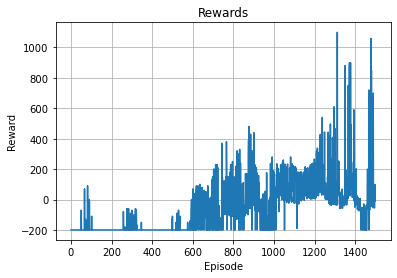

In [21]:
""" Display Training Results """
################################################
# The following codes may help you to evaluate # 
# the training results of your DQN model       #
################################################

# Plot rewards over episodes
plt.plot(all_rewards) 
plt.title("Rewards")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.grid()
plt.show()

This is not uncommon while training and evaluating RL models (especially RL models using neural networks, like DQL). There are many reasons causing such fluctuation of performance, such as different initial game states and insufficient learning of the model (try to think about other reasons!). Therefore, to obtain more comprehensible results, one often consider taking the moving average of the evaluation metrics, like rewards this time. The following figure shows an example of computing the moving average of rewards with a window size of 30 episodes. The trend of model performance that is shown by a less fluctuating line is more interpretable this time. 

<center><img src='./figures/rewards_ma.png' width='50%'/>
<center>
The moving average of rewards provides a more interpretable plot.
</center>



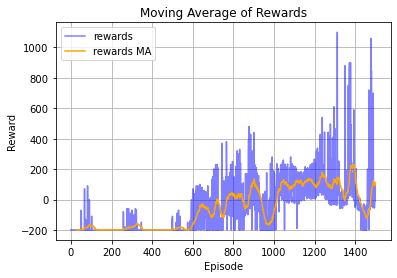

In [22]:
""" Visualize Training Resutls with Moving Average of Rewards """
################################################
# The following codes may help you to evaluate # 
# the training results of your DQN model       #
################################################

import pandas as pd
# To compute moving average of rewards with a window of 30 episodes
window = 30
rewards_df = pd.DataFrame({'reward': all_rewards})
rewards_ma = rewards_df.rolling(window=window).mean().values

# Display results
plt.title("Moving Average of Rewards")
plt.plot(all_rewards, color='blue', alpha=0.5, label="rewards")
plt.plot(rewards_ma, color='orange', label="rewards MA")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.grid()
plt.legend()
plt.show()

Another intuitive way is to simulate an episode of game play and let the DQN model play with it. Since visualization of game screen is easy, we can directly observe how the model behaves. The procedure of simulating game play is essentially the same as the training procedure, except that the DQN network weights are frozen and you may display the game screen on the fly. Therefore, the implementation will not be provided here, and this is left for your future practice.

----- 

<a id=’s5’></a>
# 5 Submission

As instructed in section 4, your task in this checkpoint is to complete the missing codes. There are 3 sections of missing codes (under Q1-3). While completing the missing codes, there are some criteria to be fulfilled in each of the 3 sections. Therefore, to complete this checkpoint, you will need to submit this notebook, with:
1. all missing codes completed (under Q1-3), and
2. code execution results showing the completed codes fulfil their criteria. 

Please feel free to add code/text cells if you need, but please make notes about the modification/addition made.

----- 
